# **Assignment 13: Generative AI Essentials**
# **(Afnan Madi)**

# **1. Dataset Preparation**

In [10]:
# Import required libraries
import requests
import numpy as np
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences



# Download Alice in Wonderland text from Project Gutenberg
url = "https://www.gutenberg.org/files/11/11-0.txt"
response = requests.get(url)
text = response.text.lower()

# Clean the text
text = text.replace('\r', '').replace('\n', ' ').replace('“', '').replace('”', '').replace('’', "'")
print(text[:500])


*** start of the project gutenberg ebook 11 ***  [illustration]     alice's adventures in wonderland  by lewis carroll  the millennium fulcrum edition 3.0  contents   chapter i.     down the rabbit-hole  chapter ii.    the pool of tears  chapter iii.   a caucus-race and a long tale  chapter iv.    the rabbit sends in a little bill  chapter v.     advice from a caterpillar  chapter vi.    pig and pepper  chapter vii.   a mad tea-party  chapter viii.  the queen's croquet-ground  chapter ix.    the


In [6]:
#2. Tokenization & Sequence Generation
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the dataset
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1

# Generate sequences of words
input_sequences = []
words = text.split()
for i in range(3, len(words)):
    n_gram_sequence = words[i-3:i+1]
    line = ' '.join(n_gram_sequence)
    token_list = tokenizer.texts_to_sequences([line])[0]
    input_sequences.append(token_list)

# Pad sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=4, padding='pre'))

# Split into predictors and label
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)


In [7]:
#4. Build and Train the Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Build a simple LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=3))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X, y, epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.0615 - loss: 6.6861
Epoch 2/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0610 - loss: 5.9856
Epoch 3/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.0639 - loss: 5.8512
Epoch 4/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.0736 - loss: 5.6785
Epoch 5/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.0771 - loss: 5.5748
Epoch 6/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.0810 - loss: 5.4334
Epoch 7/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.0888 - loss: 5.3464
Epoch 8/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.0955 - loss: 5.1921
Epoch 9/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.1109 - loss: 5.0422
Epoch 10/10
830/830 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.1180 - loss: 4.8840


In [8]:
#5. Text Generation Function

# Generate new text from seed
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=3, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        output_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += " " + output_word
    return seed_text

# Example generation
print(generate_text("alice was sitting", next_words=10))


alice was sitting on the other of the queen and the other of


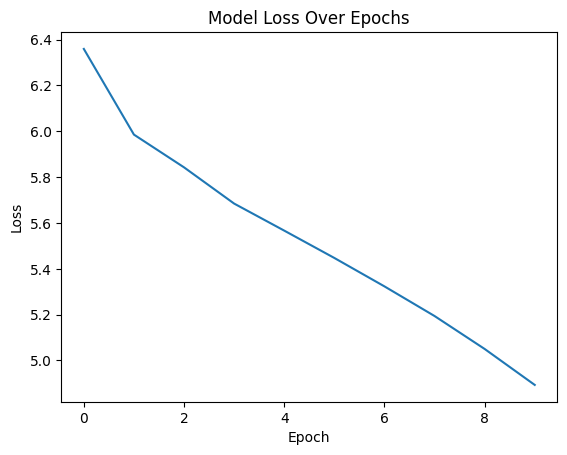

In [11]:
# Visualization (Loss Plot)

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()